In [1]:
#---------------------------------------------------------------------------------------------------------------------
#filename: 4_convert_png_to_jpg.ipynb
#description: exploratory data analysis based on the data from Elektrizitätsproduktionsanlagen (2021)
#Author: Matthias De Paolis
#The data analysis presented in this jupyter notebook has been performed with the help of chatGPT (OpenAi, 2023) 
#last updated: 26.5.23
#---------------------------------------------------------------------------------------------------------------------

### This notebook presents the exploratory data analsyis of the photovoltaic installations in the Canton of Zurich, done based on data from the source Elektrizitätsproduktionsanlagen (2021)

## <span style="color:red">Code sections that have been created using ChatGPT were marked accordingly.</span>

## Dataset

The dataset contains the following columns:

- xtf_id: The unique identifier for each row.
- Address: The address of the solar panel installation.
- PostCode: The postal code for the location of the installation.
- Municipality: The municipality where the installation is located.
- Canton: The canton where the installation is located.
- BeginningOfOperation: The date when the installation began operation.
- InitialPower: The initial power output of the installation in kilowatts.
- TotalPower: The total power output of the installation in kilowatts. This might be the same as 'InitialPower' if there have been no upgrades or changes to the installation.
- MainCategory: The main category of the installation.
- SubCategory: The subcategory of the installation.
- PlantCategory: The category of the solar panel installation, either attached (plantcat_8), integrated (plantcat_9), or freestanding (plantcat_10).
- _x and _y: The LV95 coordinates of the installation.

# Importing libraries and loading data

In [25]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('../../_data/geodata/df_pv_cleaned.csv')

# Create a dictionary for the new category names
category_names = {
    'plantcat_8': 'attached',
    'plantcat_9': 'integrated',
    'plantcat_10': 'freestanding',
}

# Replace the old names with the new ones in the 'PlantCategory' column
df['PlantCategory'] = df['PlantCategory'].replace(category_names)

# Save the modified dataframe to a new csv file
df.to_csv('../../_data/geodata/df_pv_cleaned_renamed.csv', index=False)

df.head()

,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y
0,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.8,4.8,maincat_2,subcat_2,attached,2705863.0,1240553.0
1,14729,Lärchentobelstrasse 33,8700,Küsnacht ZH,ZH,2010-11-04,21.8,21.8,maincat_2,subcat_2,integrated,2687331.0,1241205.0
2,14748,Schottikerstrasse 26,8352,Elsau,ZH,2011-11-22,2.6,2.6,maincat_2,subcat_2,attached,2702996.0,1262114.0
3,14765,Sulzbergstrasse 4,8330,Pfäffikon ZH,ZH,2009-10-26,5.0,5.0,maincat_2,subcat_2,attached,2701516.0,1248510.0
4,14768,Im Chrummenacher 6,8308,Illnau,ZH,2010-11-16,5.7,5.7,maincat_2,subcat_2,attached,2696671.0,1251184.0


After the dataset has been loaded successfully. The first few rows of the dataset provide a overview of the information it contains. First, the basic information like the number of entries, the number of non-null values in each column, and the data type of each column about the dataset are displayed. Additional, a summary statistics for the numeric columns and the count of installations for each installation category are showed.

# Exploratory Analysis

The dataset contains 9,288 entries and 13 columns. Only column 'PlantCategory' has missing value.

In [26]:
# Display basic information about the dataset
df.info()

# Summary statistics for numeric columns
summary_numeric = df.describe()

# Count of each plant category
plant_category_counts = df['PlantCategory'].value_counts()

# Count of installations in each canton
canton_counts = df['Canton'].value_counts()

summary_numeric, plant_category_counts, canton_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   xtf_id                9288 non-null   int64  
 1   Address               9288 non-null   object 
 2   PostCode              9288 non-null   int64  
 3   Municipality          9288 non-null   object 
 4   Canton                9288 non-null   object 
 5   BeginningOfOperation  9288 non-null   object 
 6   InitialPower          9288 non-null   float64
 7   TotalPower            9288 non-null   float64
 8   MainCategory          9288 non-null   object 
 9   SubCategory           9288 non-null   object 
 10  PlantCategory         8612 non-null   object 
 11  _x                    9288 non-null   float64
 12  _y                    9288 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 943.4+ KB


(              xtf_id     PostCode  InitialPower   TotalPower            _x  \
 count    9288.000000  9288.000000   9288.000000  9288.000000  9.288000e+03   
 mean   106026.981697  8474.064599     23.418035    24.509617  2.691432e+06   
 std     45097.179071   263.915930     59.315110    61.382151  1.047603e+04   
 min      8226.000000  8001.000000      0.260000     0.260000  2.669763e+06   
 25%     73934.250000  8303.000000      6.500000     6.620000  2.682586e+06   
 50%    112484.000000  8463.000000     10.000000    10.155000  2.692124e+06   
 75%    142232.500000  8635.000000     18.515000    19.000000  2.700025e+06   
 max    225269.000000  8955.000000   2481.600000  2481.600000  2.715011e+06   
 
                  _y  
 count  9.288000e+03  
 mean   1.249976e+06  
 std    1.250137e+04  
 min    1.225353e+06  
 25%    1.239260e+06  
 50%    1.249064e+06  
 75%    1.260750e+06  
 max    1.283230e+06  ,
 attached        6885
 integrated      1676
 freestanding      51
 Name: PlantC

# Visualizing the Data

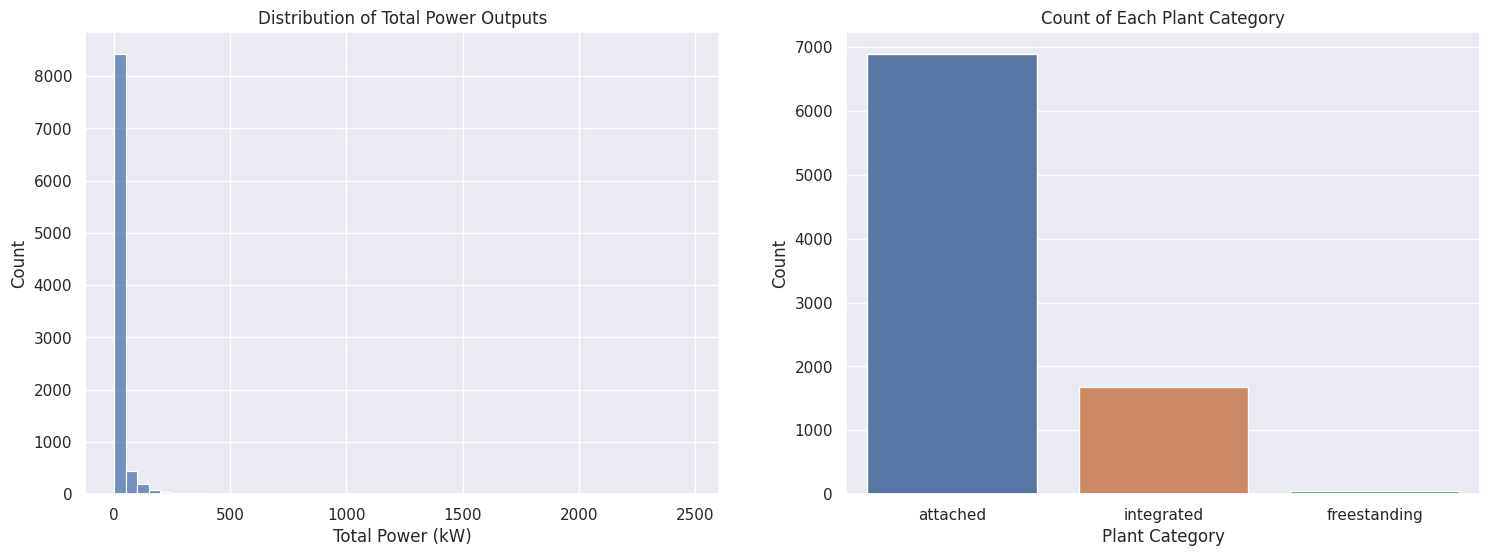

In [27]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# plot power output distribution
sns.histplot(df['TotalPower'], ax=ax[0], bins=50)
ax[0].set_title('Distribution of Total Power Outputs')
ax[0].set_xlabel('Total Power (kW)')
ax[0].set_ylabel('Count')

# plot plant categories
sns.countplot(x='PlantCategory', data=df, ax=ax[1], order = df['PlantCategory'].value_counts().index)
ax[1].set_title('Count of Each Plant Category')
ax[1].set_xlabel('Plant Category')
ax[1].set_ylabel('Count')

plt.show()  

# Data Preprocessing

1. The missing values in the 'PlantCategory' column were replaced with the category "unknown".

2. The 'InitialPower' and 'TotalPower' columns were transformed using a logarithmic transformation. The new columns 'LogInitialPower' and 'LogTotalPower' contain the transformed values.

3. The 'PlantCategory' column was one-hot encoded, producing three new columns: 'PlantCategory_plantcat_8', 'PlantCategory_plantcat_9', and 'PlantCategory_unknown'. Each of these columns indicates to which plant category the corresponding row belongs.

In [28]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# 1. Handle missing values
df['PlantCategory'].fillna('unknown', inplace=True)

# 2. Transform skewed variables
df['LogInitialPower'] = np.log1p(df['InitialPower'])
df['LogTotalPower'] = np.log1p(df['TotalPower'])

# 3. Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
plant_category_encoded = encoder.fit_transform(df[['PlantCategory']])
df_encoded = pd.concat([df, pd.DataFrame(plant_category_encoded, 
                                         columns=encoder.get_feature_names_out(['PlantCategory']))], axis=1)
# Check the first few rows of the updated dataframe
df_encoded.head()    

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,xtf_id,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,LogInitialPower,LogTotalPower,PlantCategory_freestanding,PlantCategory_integrated,PlantCategory_unknown
0,9476,Holzweidstrasse 8,8340,Hinwil,ZH,2006-04-21,4.8,4.8,maincat_2,subcat_2,attached,2705863.0,1240553.0,1.757858,1.757858,0.0,0.0,0.0
1,14729,Lärchentobelstrasse 33,8700,Küsnacht ZH,ZH,2010-11-04,21.8,21.8,maincat_2,subcat_2,integrated,2687331.0,1241205.0,3.126761,3.126761,0.0,1.0,0.0
2,14748,Schottikerstrasse 26,8352,Elsau,ZH,2011-11-22,2.6,2.6,maincat_2,subcat_2,attached,2702996.0,1262114.0,1.280934,1.280934,0.0,0.0,0.0
3,14765,Sulzbergstrasse 4,8330,Pfäffikon ZH,ZH,2009-10-26,5.0,5.0,maincat_2,subcat_2,attached,2701516.0,1248510.0,1.791759,1.791759,0.0,0.0,0.0
4,14768,Im Chrummenacher 6,8308,Illnau,ZH,2010-11-16,5.7,5.7,maincat_2,subcat_2,attached,2696671.0,1251184.0,1.902108,1.902108,0.0,0.0,0.0


# Preparing for further analysis

The total power output of photovoltaic installations has increased over the years, indicating a positive trend in regard of the photovoltaic installations. 
The average total power output varies by plant category. Freestanding installations ('plantcat_10') and installations with an unknown category have the highest average power output. Integrated installations ('plantcat_9') have the lowest average power output, and attached installations ('plantcat_8') have a slightly higher average power output.

In [29]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Convert the 'BeginningOfOperation' column to datetime format
df_encoded['BeginningOfOperation'] = pd.to_datetime(df_encoded['BeginningOfOperation'])

# Generate a year column for time series analysis
df_encoded['YearOfOperation'] = df_encoded['BeginningOfOperation'].dt.year

# 1. Total power output over time
df_grouped_by_year = df_encoded.groupby('YearOfOperation')['TotalPower'].sum().reset_index()

# 2. Relationship between installation type and total power output
df_grouped_by_plant_category = df_encoded.groupby('PlantCategory')['TotalPower'].mean().reset_index()

df_grouped_by_year, df_grouped_by_plant_category   

(    YearOfOperation  TotalPower
 0              1990        7.80
 1              1991       13.43
 2              1992       30.40
 3              1993       18.50
 4              1994      248.84
 5              1995        1.00
 6              1996       45.90
 7              1997      248.00
 8              1998      476.30
 9              1999      371.44
 10             2000       74.44
 11             2001      446.20
 12             2002      611.30
 13             2003      215.60
 14             2004      483.62
 15             2005      361.25
 16             2006      336.00
 17             2007     1665.31
 18             2008     1895.93
 19             2009     3413.86
 20             2010     4227.54
 21             2011     9424.44
 22             2012    17378.65
 23             2013    18732.15
 24             2014    16731.55
 25             2015    29739.46
 26             2016    23688.91
 27             2017    23439.30
 28             2018    24462.60
 29       

# Visualizing Total Power Output over Time and per Category

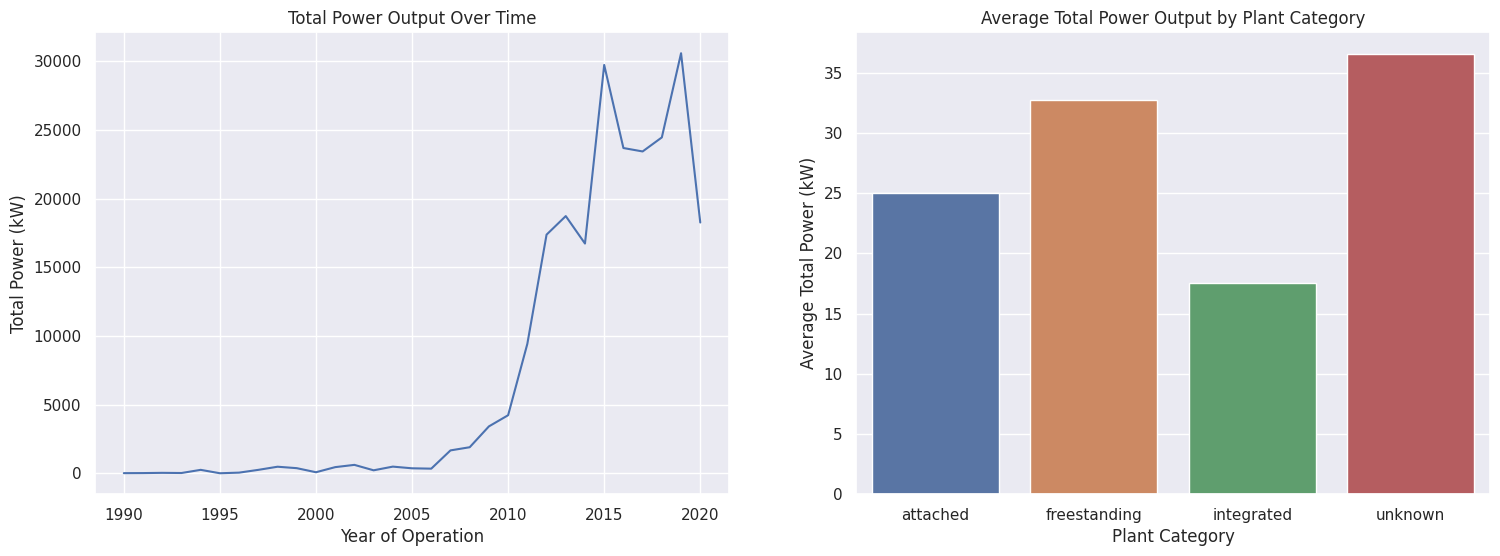

In [39]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Create a figure
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Total power output over time
sns.lineplot(x='YearOfOperation', y='TotalPower', data=df_grouped_by_year, ax=ax[0])
ax[0].set_title('Total Power Output Over Time')
ax[0].set_xlabel('Year of Operation')
ax[0].set_ylabel('Total Power (kW)')

# Relationship between installation type and total power output
sns.barplot(x='PlantCategory', y='TotalPower', data=df_grouped_by_plant_category, ax=ax[1])
ax[1].set_title('Average Total Power Output by Plant Category')
ax[1].set_xlabel('Plant Category')
ax[1].set_ylabel('Average Total Power (kW)')

plt.show()    

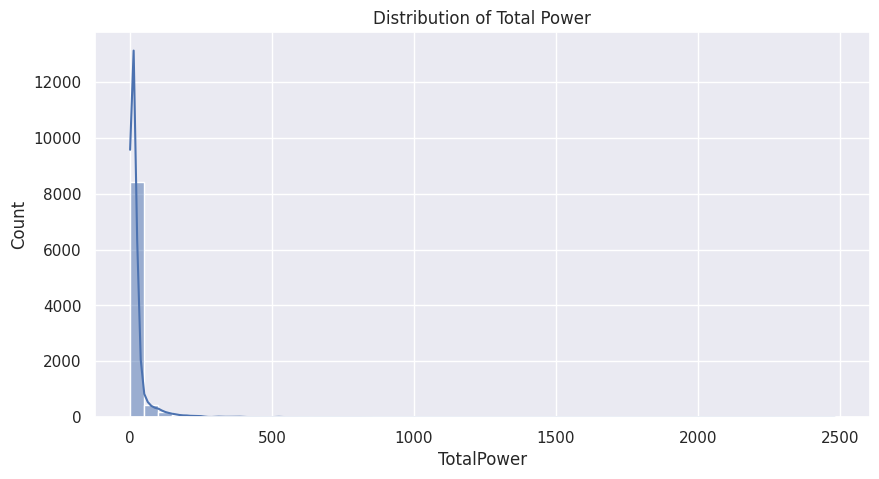

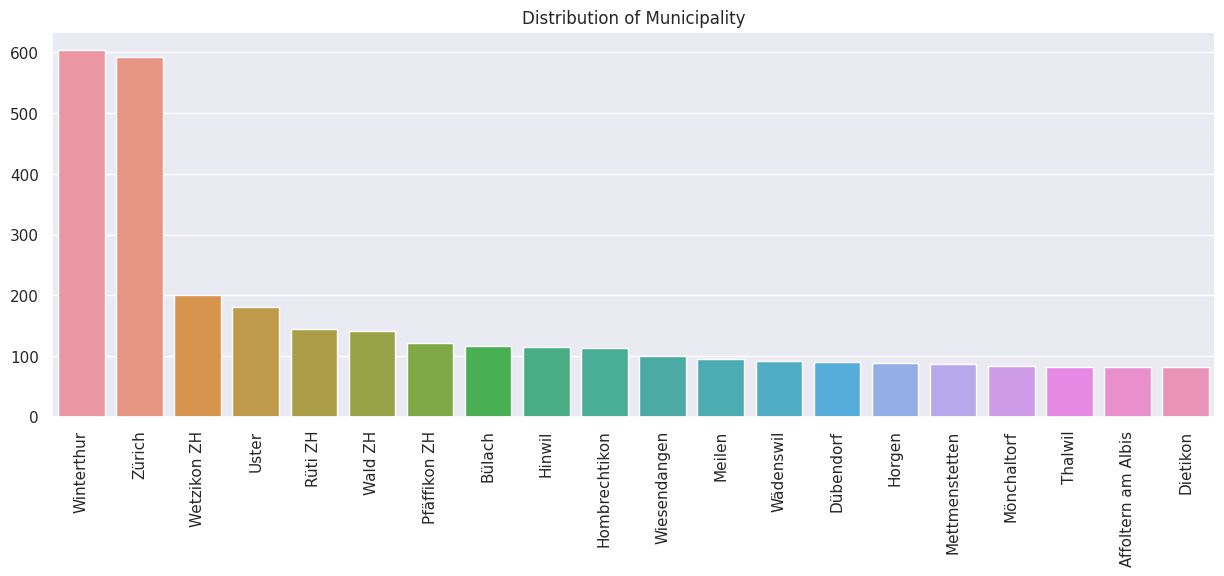

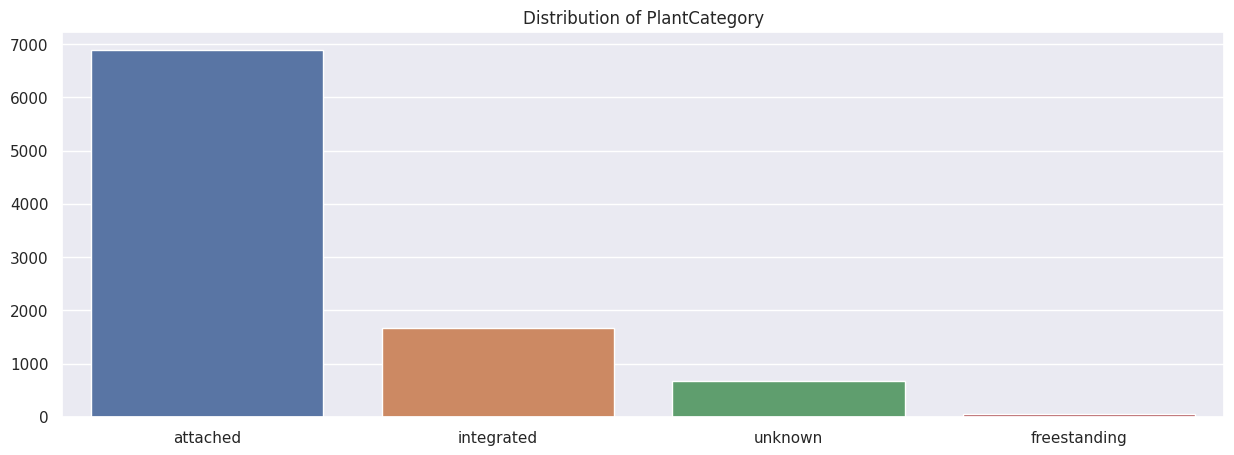

In [40]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Histogram for 'TotalPower'
plt.figure(figsize=(10, 5))
sns.histplot(df['TotalPower'], bins=50, kde=True)
plt.title('Distribution of Total Power')
plt.show()

# Bar plots for 'Municipality' and 'PlantCategory'
cat_cols = ['Municipality', 'PlantCategory']

for col in cat_cols:
    plt.figure(figsize=(15, 5))
    if col == 'Municipality':
        # For Municipality, limit to top 20
        data = df[col].value_counts().head(20)
    else:
        # For PlantCategory, include all categories
        data = df[col].value_counts()
    sns.barplot(x=data.index, y=data.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90 if col == 'Municipality' else 0)
    plt.show()

In [35]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Convert 'BeginningOfOperation' to datetime
df['BeginningOfOperation'] = pd.to_datetime(df['BeginningOfOperation'])

# Calculate the number of new operations and the average power for each year
annual_operations = df.groupby(df['BeginningOfOperation'].dt.year).agg({'xtf_id': 'count', 'TotalPower': 'mean'})

# Rename the columns for clarity
annual_operations.rename(columns={'xtf_id': 'NumberOfOperations', 'TotalPower': 'AveragePower'}, inplace=True)

# Display the annual_operations DataFrame
annual_operations


,NumberOfOperations,AveragePower
BeginningOfOperation,,
1990,2,3.900000
1991,2,6.715000
1992,6,5.066667
1993,4,4.625000
1994,5,49.768000
1995,1,1.000000
1996,4,11.475000
1997,10,24.800000
1998,14,34.021429


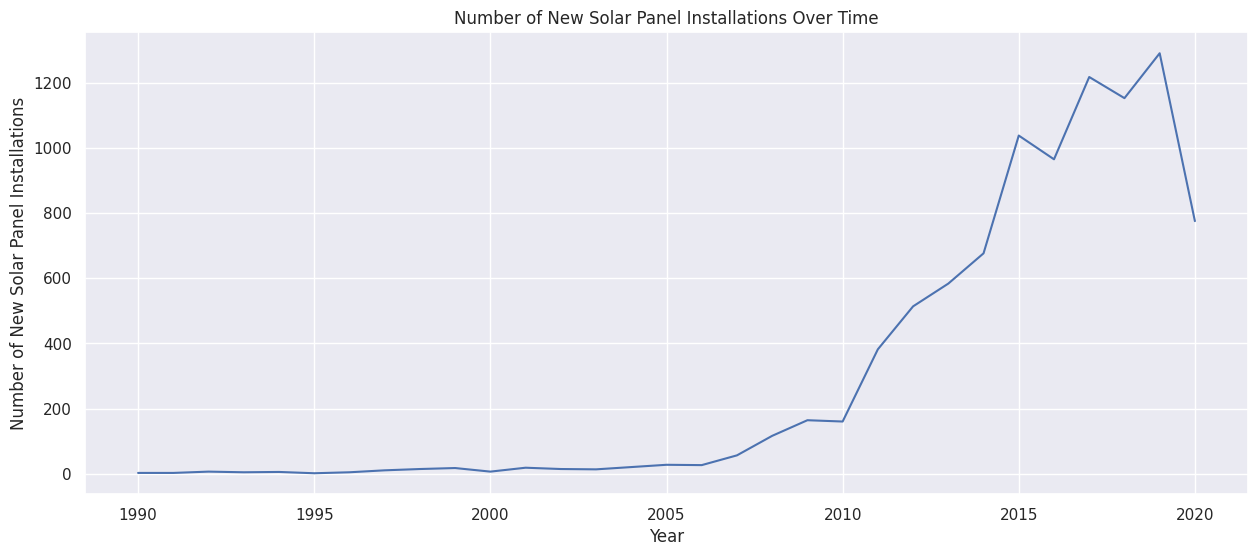

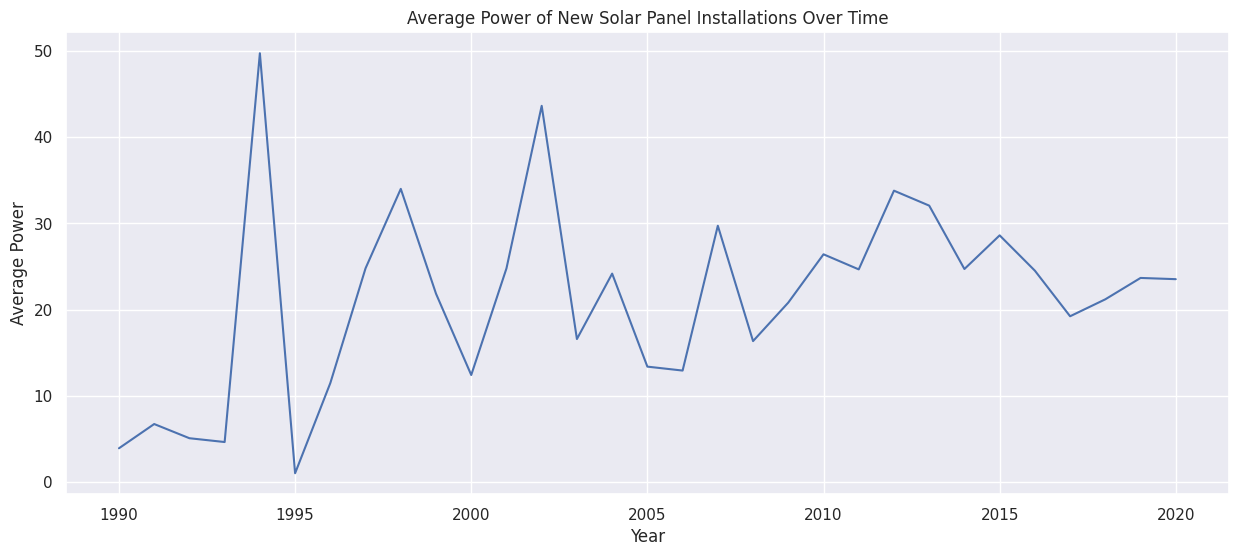

In [41]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Plot the number of new operations over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=annual_operations.index, y=annual_operations['NumberOfOperations'])
plt.title('Number of New Solar Panel Installations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Solar Panel Installations')
plt.grid(True)
plt.show()

# Plot the average power of new operations over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=annual_operations.index, y=annual_operations['AveragePower'])
plt.title('Average Power of New Solar Panel Installations Over Time')
plt.xlabel('Year')
plt.ylabel('Average Power')
plt.grid(True)
plt.show()

# Analyzing the Different Plant Categories

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


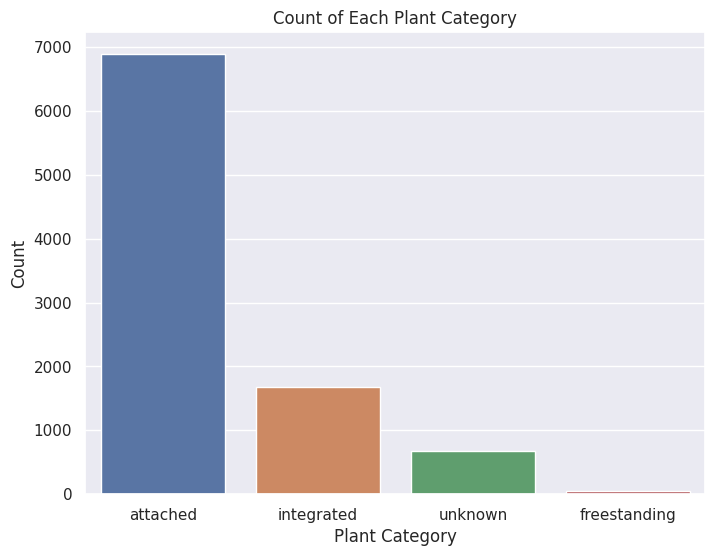

In [37]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Convert the 'BeginningOfOperation' column to datetime format
df['BeginningOfOperation'] = pd.to_datetime(df['BeginningOfOperation'])
df['YearOfOperation'] = df['BeginningOfOperation'].dt.year

# Handle missing values
df['PlantCategory'].fillna('unknown', inplace=True)

# Transform skewed variables
df['LogInitialPower'] = np.log1p(df['InitialPower'])
df['LogTotalPower'] = np.log1p(df['TotalPower'])

# Encode categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
plant_category_encoded = encoder.fit_transform(df[['PlantCategory']])
df_encoded = pd.concat([df, pd.DataFrame(plant_category_encoded, 
                                         columns=encoder.get_feature_names_out(['PlantCategory']))], axis=1)

# Create a figure for plant category distribution
fig, ax = plt.subplots(figsize=(8, 6))

# Count plot of plant categories
sns.countplot(x='PlantCategory', data=df_encoded, ax=ax, order = df_encoded['PlantCategory'].value_counts().index)
ax.set_title('Count of Each Plant Category')
ax.set_xlabel('Plant Category')
ax.set_ylabel('Count')

plt.show()

The plot shows the count of each plant category in the dataset. Most of the installations are of the attached type ('plantcat_8'), followed by the integrated type ('plantcat_9'). There are very few freestanding installations ('plantcat_10'), and a small number of installations have an unknown category.

/tmp/ipykernel_755/1864013749.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df_pivot = df_grouped_by_year_category.pivot('YearOfOperation', 'PlantCategory', 'Count').fillna(0)


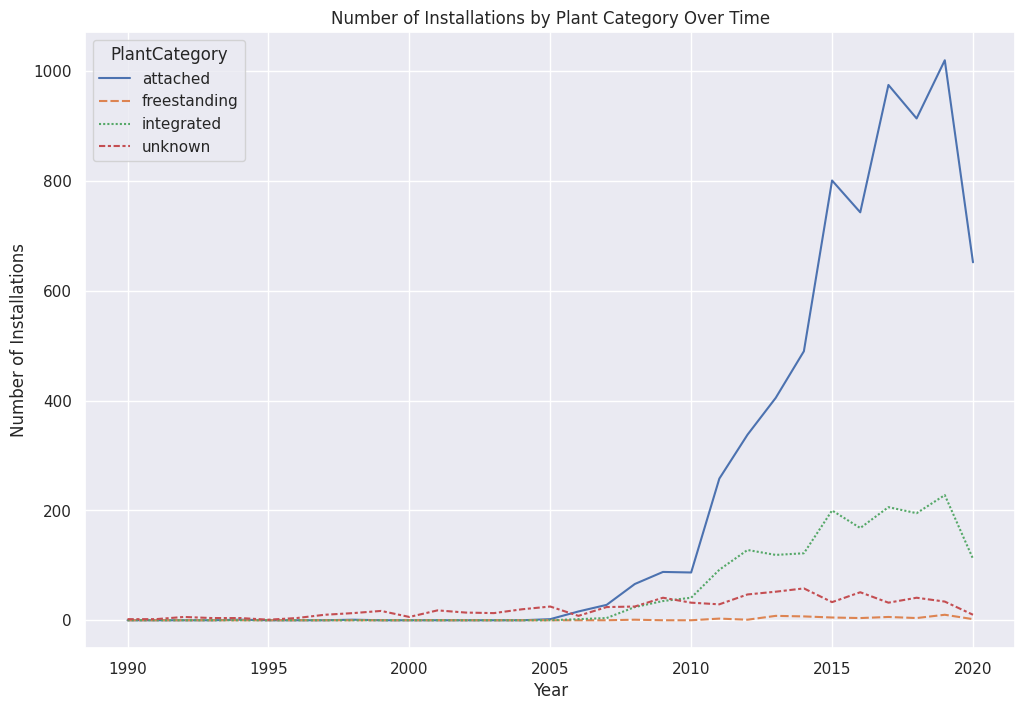

In [24]:
#------------------------------------------------------#
#  THIS SECTION WAS CREATED BY CHATGPT (OpenAi, 2023) #
#----------------------------------------------------#

# Convert the 'BeginningOfOperation' column to datetime format
df['BeginningOfOperation'] = pd.to_datetime(df['BeginningOfOperation'])
df['YearOfOperation'] = df['BeginningOfOperation'].dt.year

# Handle missing values
df['PlantCategory'].fillna('unknown', inplace=True)

# Group by year and plant category
df_grouped_by_year_category = df.groupby(['YearOfOperation', 'PlantCategory']).size().reset_index(name='Count')

# Pivot the dataframe for better visualization
df_pivot = df_grouped_by_year_category.pivot('YearOfOperation', 'PlantCategory', 'Count').fillna(0)

# Plot
plt.figure(figsize=(12,8))
sns.lineplot(data=df_pivot)
plt.title('Number of Installations by Plant Category Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Installations')
plt.show()


The line plot above shows the number of installations by plant category over time.
Installations of attached solar panels ('plantcat_8') have been increasing since around 2008 and are the most common type of installation in all years.
The number of integrated installations ('plantcat_9') also started to increase around 2008.
The number of freestanding installations ('plantcat_10') is  low and no clear trend can be idetified.